### 다중 분류 - Wine dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

seed = 2023

np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
tf.__version__

'2.14.0'

- 데이터 전처리

In [3]:
from sklearn.datasets import load_wine
wine = load_wine()
wine.data.shape

(178, 13)

In [4]:
# X 데이터는 표준화
from sklearn.preprocessing import StandardScaler
wine_std = StandardScaler().fit_transform(wine.data)

In [5]:
# y 데이터
np.unique(wine.target, return_counts=True)

(array([0, 1, 2]), array([59, 71, 48], dtype=int64))

In [6]:
# y 데이터 값이 3가지 이상일 경우에는 원핫인코딩
from tensorflow.keras.utils import to_categorical
Y = to_categorical(wine.target, 3)
Y.shape, Y[:5], '몇번째가 1인가에따라 y값이 결정됨'

((178, 3),
 array([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]], dtype=float32),
 '몇번째가 1인가에따라 y값이 결정됨')

In [7]:
# 데이터셋 분리
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    wine_std, Y, stratify=Y ,test_size=0.2, random_state=seed
)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((142, 13), (36, 13), (142, 3), (36, 3))

- 모델 정의/설정/학습/평가

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [9]:
model = Sequential([
    Dense(30, input_dim=13, activation='relu'),
    Dense(12, activation='relu'),
    Dense(3, activation='softmax')  # 노드의 개수는 y의 개수와 동일, 활성화 함수는 softmax
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                420       
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 dense_2 (Dense)             (None, 3)                 39        
                                                                 
Total params: 831 (3.25 KB)
Trainable params: 831 (3.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# 모델 컴파일
# 다중분류에서는 loss='categorical_crossentropy'
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
# 학습
hist = model.fit(X_train, Y_train, validation_split=0.2,
                 epochs=100, batch_size=100, verbose=0)

In [12]:
# 평가
model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.0920 - accuracy: 0.9722


[0.09199598431587219, 0.9722222089767456]

In [13]:
# 예측
pred = model.predict(X_test)
pred[:5]

2/2 [==============================] - 0s 3ms/step


array([[6.4933603e-03, 2.6241802e-03, 9.9088252e-01],
       [9.9944097e-01, 2.8302250e-04, 2.7610347e-04],
       [9.6010149e-04, 9.9049956e-01, 8.5403780e-03],
       [9.9314123e-01, 4.8787040e-03, 1.9801487e-03],
       [1.2704275e-02, 9.8285127e-01, 4.4444241e-03]], dtype=float32)

- 학습과정 시각화

In [14]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc) + 1)

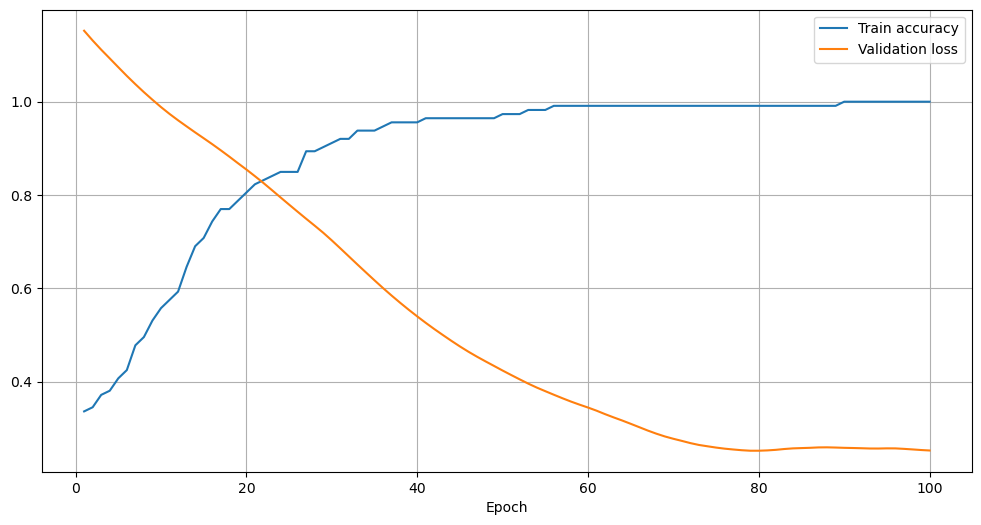

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(xs, y_acc, label='Train accuracy')
plt.plot(xs, y_vloss, label='Validation loss')
plt.legend(), plt.grid(), plt.xlabel('Epoch')
plt.show()